In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf

# Load dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Function to extract images and convert to NumPy
def dataset_to_numpy(ds):
    images = []
    for img, _ in tfds.as_numpy(ds):
        img = tf.image.resize(img, (128, 128))  # or 224x224
        img = img.numpy().astype('float32') / 255.  # normalize
        images.append(img)
    return np.array(images)

# Convert train and test sets
x_train = dataset_to_numpy(dataset['test'])
x_test = dataset_to_numpy(dataset['train'])

print(x_train.shape)
print(x_test.shape)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G6I65X_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G6I65X_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G6I65X_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
(6149, 128, 128, 3)
(1020, 128, 128, 3)


In [ ]:
x_train[0].shape

(128, 128, 3)

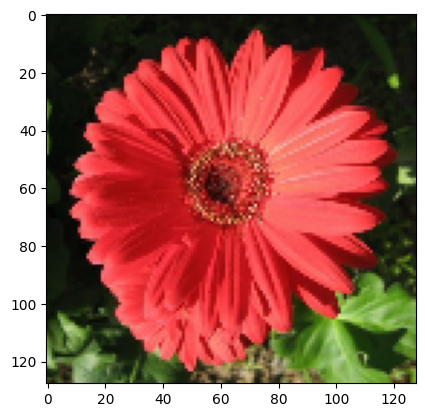

In [ ]:
#afficher l'image
plt.imshow(x_train[0], cmap='gray')

In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(), #28*28
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
#Initialisation du modele
autoencoder = Autoencoder(latent_dim, shape)


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - loss: 0.0633 - val_loss: 0.0526
Epoch 2/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - loss: 0.0481 - val_loss: 0.0468
Epoch 3/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - loss: 0.0451 - val_loss: 0.0469
Epoch 4/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - loss: 0.0443 - val_loss: 0.0464
Epoch 5/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - loss: 0.0438 - val_loss: 0.0466


testing it with encoding decoding images from the test set

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
encoded_imgs.shape #taille de l'espace latent 64

(1020, 64)

In [ ]:
decoded_imgs.shape

(1020, 128, 128, 3)

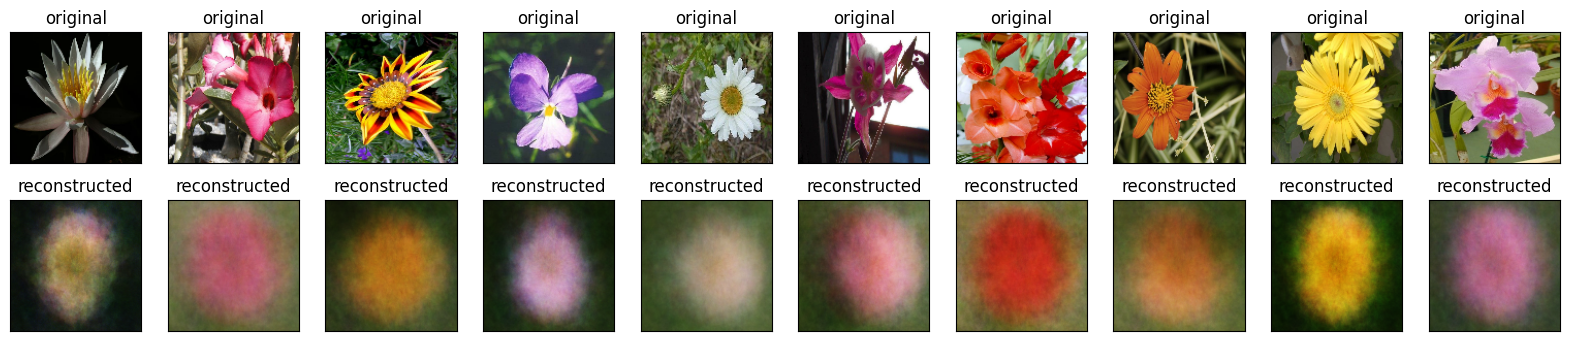

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Reconstructing masked images

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

In [5]:
# 1. Load Oxford Flowers 102
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.C1FVDD_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.C1FVDD_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.C1FVDD_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [6]:
# 2. Convert to grayscale, resize, normalize
def preprocess(ds):
    images = []
    for img, _ in tfds.as_numpy(ds):
        img = tf.image.resize(img, (128, 128))                   # Resize to 128x128
        # img = tf.squeeze(img, axis=-1)                           # Remove (H, W, 1) -> (H, W)
        img = img.numpy().astype('float32') / 255.0              # Normalize to [0, 1]
        images.append(img)
    return np.array(images)



In [7]:
x_train = preprocess(dataset['test'])      # Shape: (6149, 128, 128)
x_test = preprocess(dataset['train'])        # Shape: (1020, 128, 128)

In [8]:
x_train.shape

(6149, 128, 128, 3)

In [9]:
# 3. Apply hard masking
def apply_random_masking(x_data, mask_ratio=0.3):
    mask = np.random.binomial(1, 1 - mask_ratio, size=x_data.shape).astype('float32')
    return x_data * mask



In [10]:
x_train_masked = apply_random_masking(x_train, mask_ratio=0.3)
x_test_masked = apply_random_masking(x_test, mask_ratio=0.3)

# 4. (Optional) Add channel dimension for model input: (N, H, W, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train_masked = np.expand_dims(x_train_masked, axis=-1)
x_test_masked = np.expand_dims(x_test_masked, axis=-1)

In [11]:
x_train.shape

(6149, 128, 128, 3, 1)

In [12]:
x_train_masked.shape

(6149, 128, 128, 3, 1)

In [13]:
x_test_masked.shape

(1020, 128, 128, 3, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class Decoder(Model):
    def __init__(self):
        super(Decoder, self).__init__()

        # --- Encoder ---
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(128, 128, 3)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
        ])

        # --- Decoder ---
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output shape: (128, 128, 3)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
# Create and compile the model
autoencoder = Decoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [16]:
autoencoder.fit(
    x_train_masked, x_train,
    epochs=5,
    shuffle=True,
    validation_data=(x_test_masked, x_test)
)


Epoch 1/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - loss: 0.0614 - val_loss: 0.0165
Epoch 2/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - loss: 0.0155 - val_loss: 0.0140
Epoch 3/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - loss: 0.0134 - val_loss: 0.0103
Epoch 4/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - loss: 0.0092 - val_loss: 0.0085
Epoch 5/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - loss: 0.0080 - val_loss: 0.0080


In [17]:
 autoencoder.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,880 (97.19 KB)

 Trainable params: 24,880 (97.19 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
autoencoder.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 32, 32, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 128, 64)   │        18,496 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,187 (106.20 KB)

 Trainable params: 27,187 (106.20 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
encoded_imgs = autoencoder.encoder(x_test_masked).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

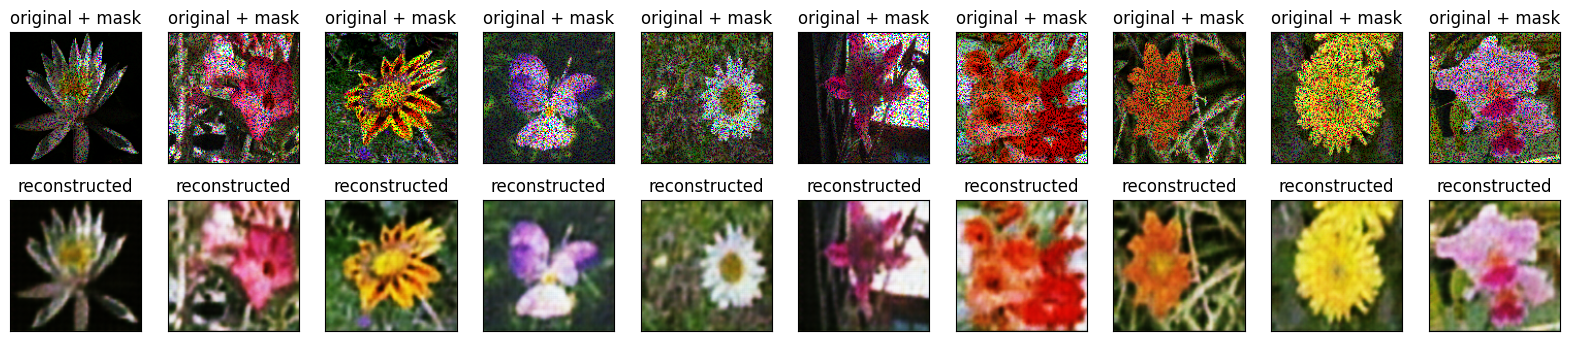

In [20]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + mask")
    plt.imshow(tf.squeeze(x_test_masked[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()